In [5]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("clusterProfiler")
BiocManager::install("org.Hs.eg.db")
install.packages("ggridges")
install.packages('europepmc')

In [3]:
library(clusterProfiler)
library(enrichplot)
library(ggplot2)
library("org.Hs.eg.db")



clusterProfiler v4.6.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter




In [5]:
expression_file = read.csv("path to drug file or file of overlapping genes with the corresponding expression")
expression_file_original_gene_list <- expression_file$log2FoldChange
names(expression_file_original_gene_list) <- expression_file$Gene.name
expression_file_gene_list<-na.omit(expression_file_original_gene_list)
expression_file_gene_list = sort(expression_file_gene_list, decreasing = TRUE)


In [8]:
#  Conducting GO Enrichment Analysis

gse <- gseGO(geneList=expression_file_gene_list, 
             ont ="ALL", 
             keyType = "SYMBOL", 
#              nPerm = 10000,
             minGSSize = 3, 
             maxGSSize = 800, 
             pvalueCutoff = 0.05, 
             verbose = TRUE, 
             OrgDb=org.Hs.eg.db, 
             pAdjustMethod = "none")

preparing geneSet collections...

GSEA analysis...

Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
leading edge analysis...

done...



Loading required package: DOSE

DOSE v3.24.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609




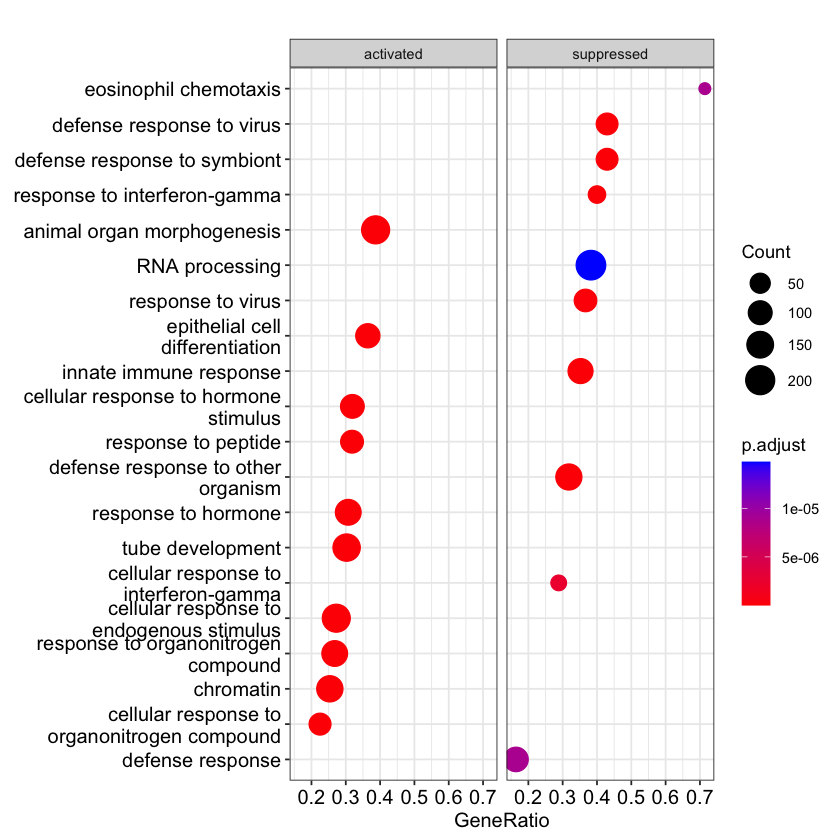

In [9]:
require(DOSE)
dotplot(gse, showCategory=10, split=".sign")  + facet_grid(.~.sign)

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


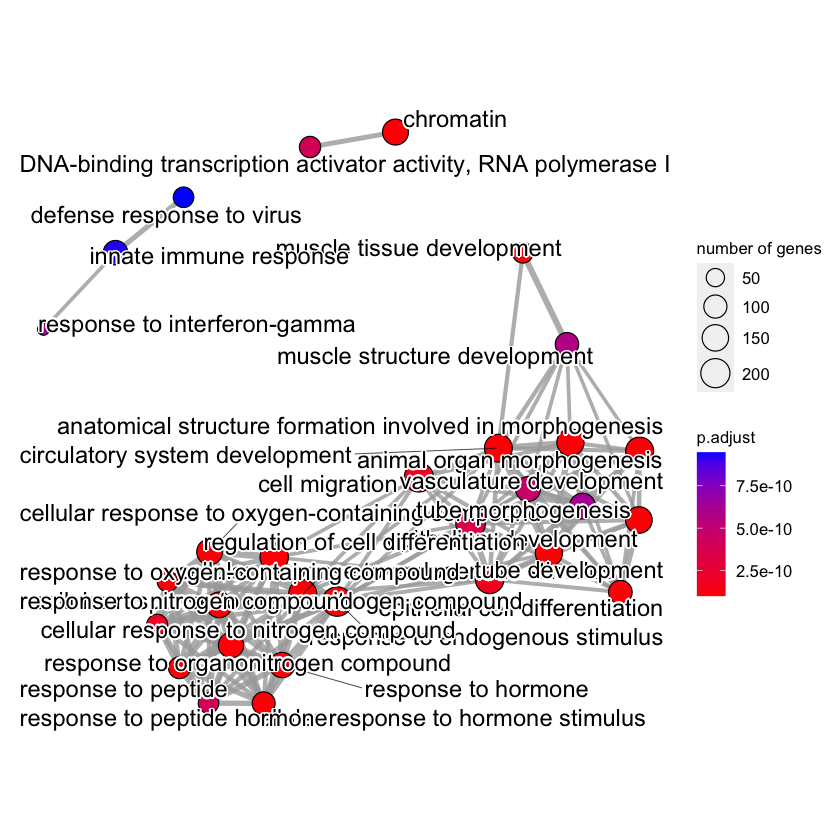

In [10]:
x2 <- pairwise_termsim(gse)

emapplot(x2)

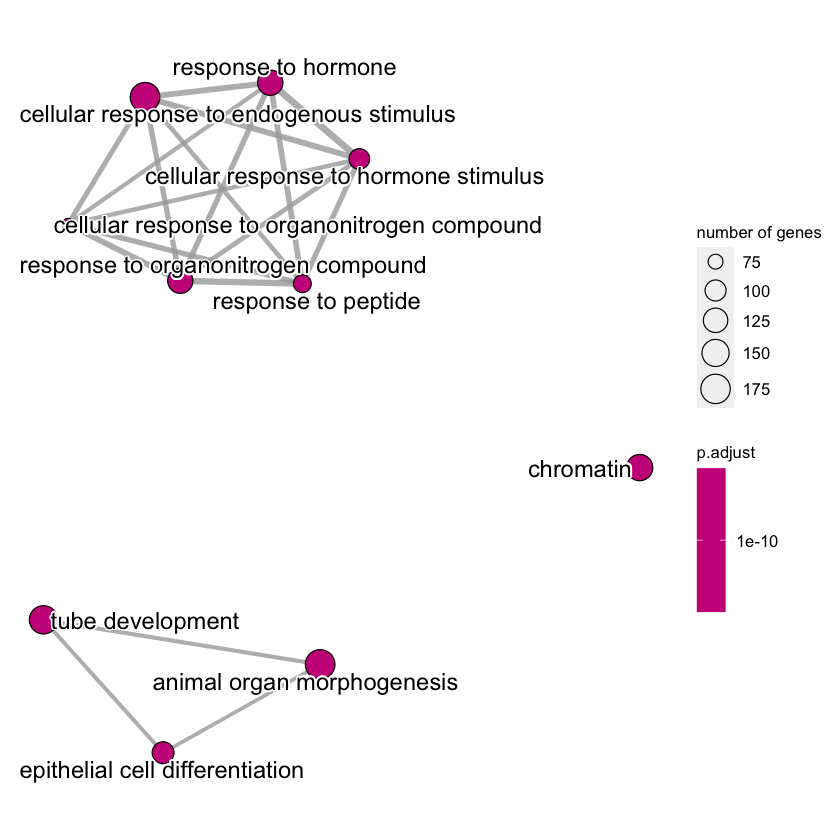

In [11]:
emapplot(x2, showCategory=10)

Warning message in cnetplot.enrichResult(x, ...):
“Use 'color.params = list(foldChange = your_value)' instead of 'foldChange'.
 The foldChange parameter will be removed in the next version.”
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.
Warning message:
“ggrepel: 27 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


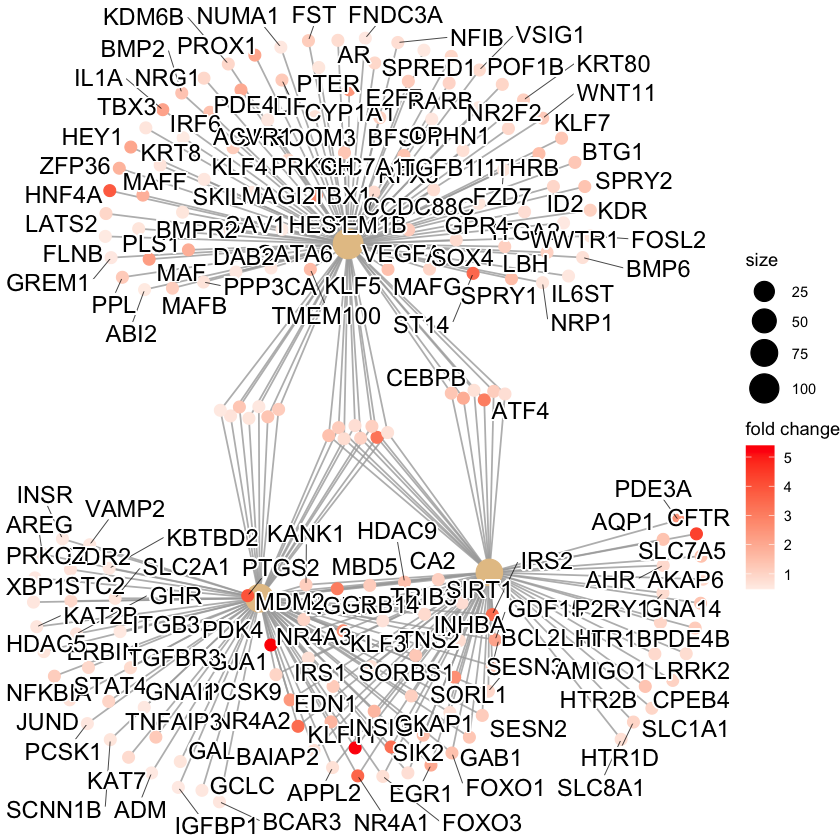

In [12]:
# categorySize can be either 'pvalue' or 'geneNum'

cnetplot(gse, categorySize="pvalue", foldChange=expression_file_gene_list, showCategory = 3)

Picking joint bandwidth of 0.188



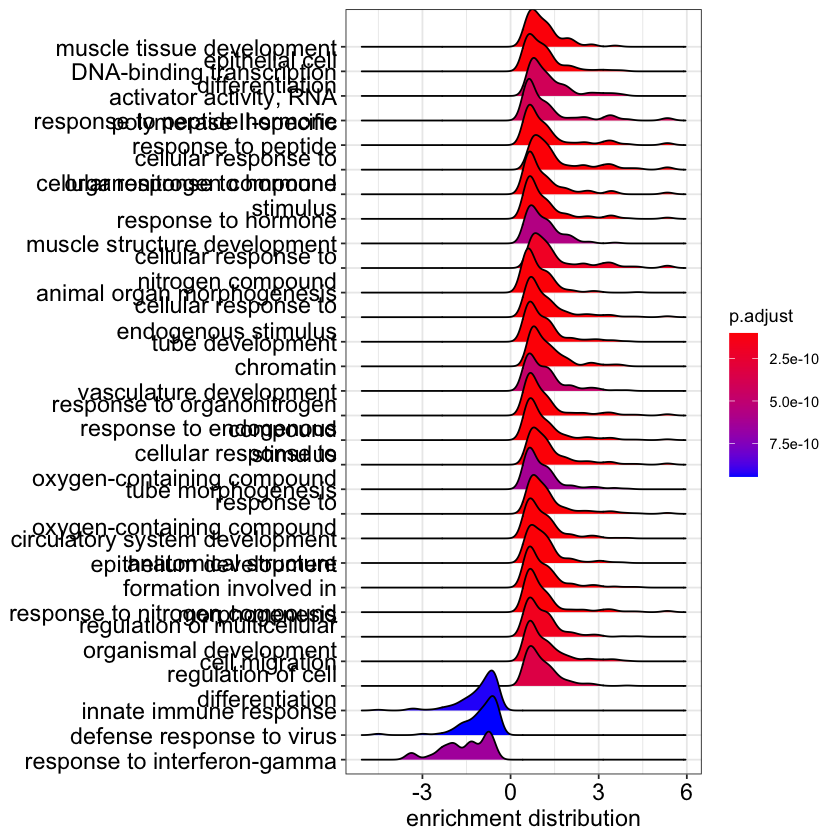

In [13]:
library(ggridges)

ridgeplot(gse) + labs(x = "enrichment distribution", showCategory=10)

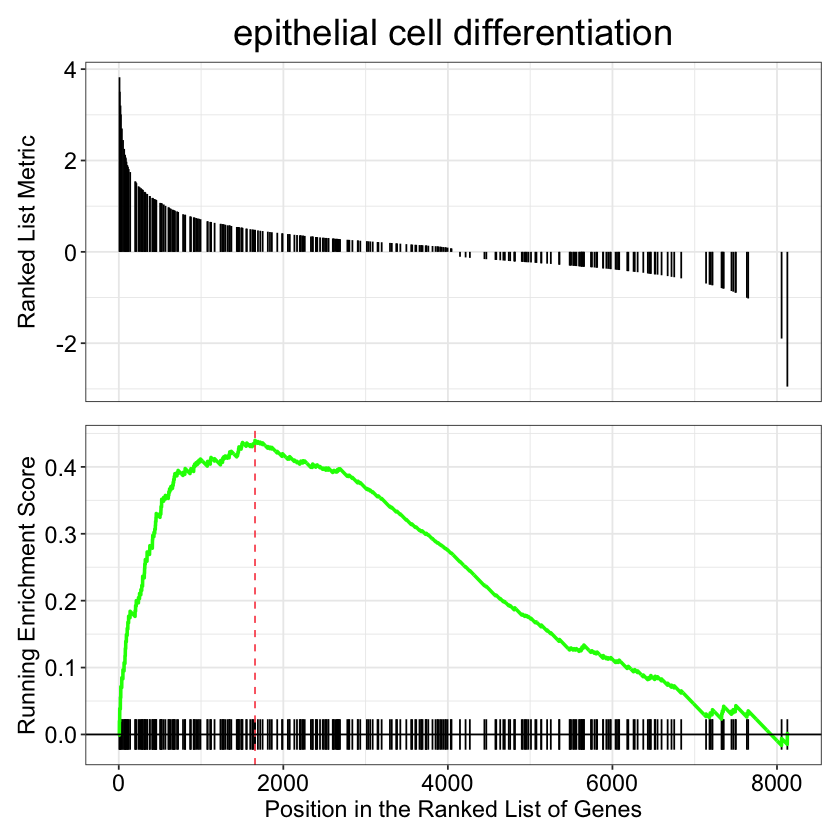

In [14]:
gseaplot(gse, by = "all", title = gse$Description[1], geneSetID = 1)

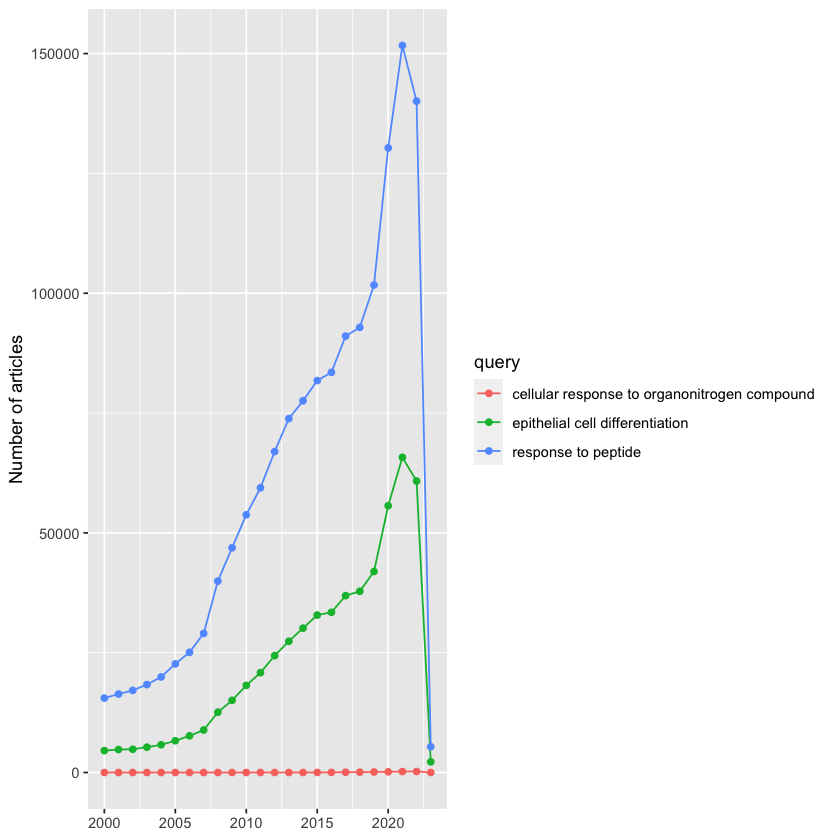

In [15]:
library(europepmc)

terms <- gse$Description[1:3]
pmcplot(terms, 2000:2023, proportion=FALSE)

In [16]:
gse

#
# Gene Set Enrichment Analysis
#
#...@organism 	 Homo sapiens 
#...@setType 	 GOALL 
#...@keytype 	 SYMBOL 
#...@geneList 	 Named num [1:8137] 5.39 5.29 4.86 4.52 4.5 ...
 - attr(*, "names")= chr [1:8137] "PDK4" "SCNN1G" "GPX2" "ALPPL2" ...
#...nPerm 	 
#...pvalues adjusted by 'none' with cutoff <0.05 
#...2029 enriched terms found
'data.frame':	2029 obs. of  12 variables:
 $ ONTOLOGY       : chr  "BP" "BP" "BP" "BP" ...
 $ ID             : chr  "GO:0030855" "GO:1901652" "GO:0071417" "GO:0032870" ...
 $ Description    : chr  "epithelial cell differentiation" "response to peptide" "cellular response to organonitrogen compound" "cellular response to hormone stimulus" ...
 $ setSize        : int  291 264 320 307 433 460 650 539 560 493 ...
 $ enrichmentScore: num  0.44 0.433 0.422 0.415 0.398 ...
 $ NES            : num  2.2 2.15 2.14 2.1 2.08 ...
 $ pvalue         : num  1e-10 1e-10 1e-10 1e-10 1e-10 ...
 $ p.adjust       : num  1e-10 1e-10 1e-10 1e-10 1e-10 ...
 $ qvalue         : num

In [92]:
expression_file = read.csv("path to drug file or file of overlapping genes with the corresponding expression")

# Converting gene symbol to Entrez ID for KEGG GSEA
expression_file <- expression_file %>% mutate(entrez = mapIds(org.Hs.eg.db, keys = expression_file$Gene.name,
       column = "ENTREZID", keytype = "SYMBOL")) %>% filter(!is.na(entrez))

kegg_gene_list <- expression_file$log2FoldChange

# Name vector with Entrez IDs
names(kegg_gene_list) <- expression_file$entrez

# Omit any NA values 
kegg_gene_list<-na.omit(kegg_gene_list)

# Sort the list in decreasing order (required for clusterProfiler)
kegg_gene_list = sort(kegg_gene_list, decreasing = TRUE)


'select()' returned 1:1 mapping between keys and columns



In [93]:
#  Conducting KEGG Enrichment Analysis

kk2 <- gseKEGG(geneList     = kegg_gene_list,
               organism     = "human",
#                nPerm        = 10000,
               minGSSize    = 3,
               maxGSSize    = 800,
               pvalueCutoff = 0.05,
               pAdjustMethod = "none",
               keyType       = "ncbi-geneid")
convert_file <- head(kk2, 10)

preparing geneSet collections...

GSEA analysis...

leading edge analysis...

done...



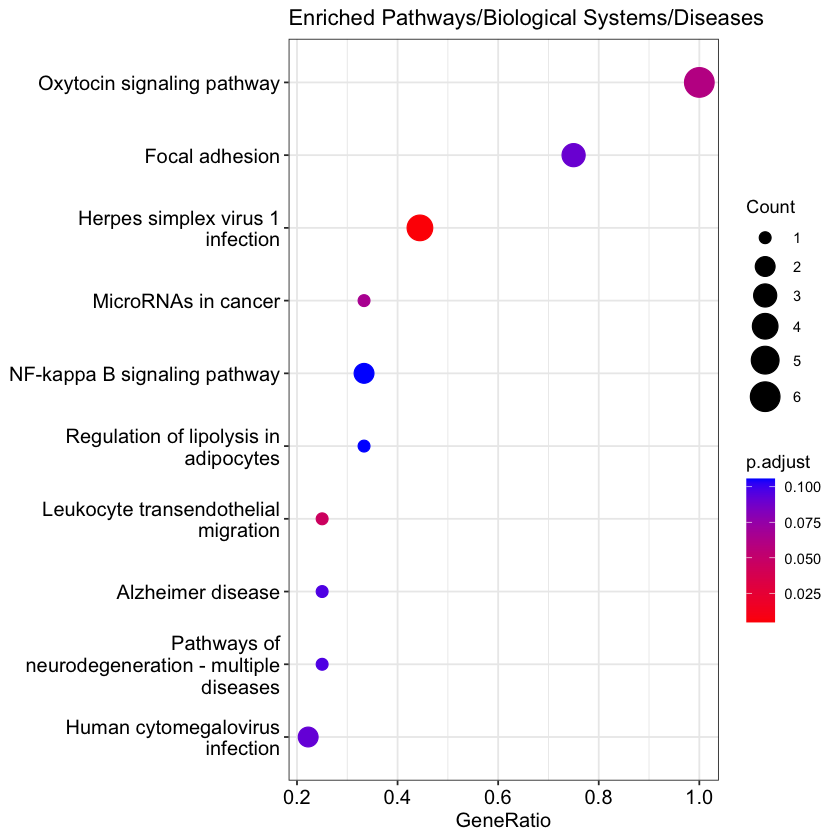

In [94]:
dotplot(kk2, showCategory = 10, title = "Enriched Pathways/Biological Systems/Diseases")

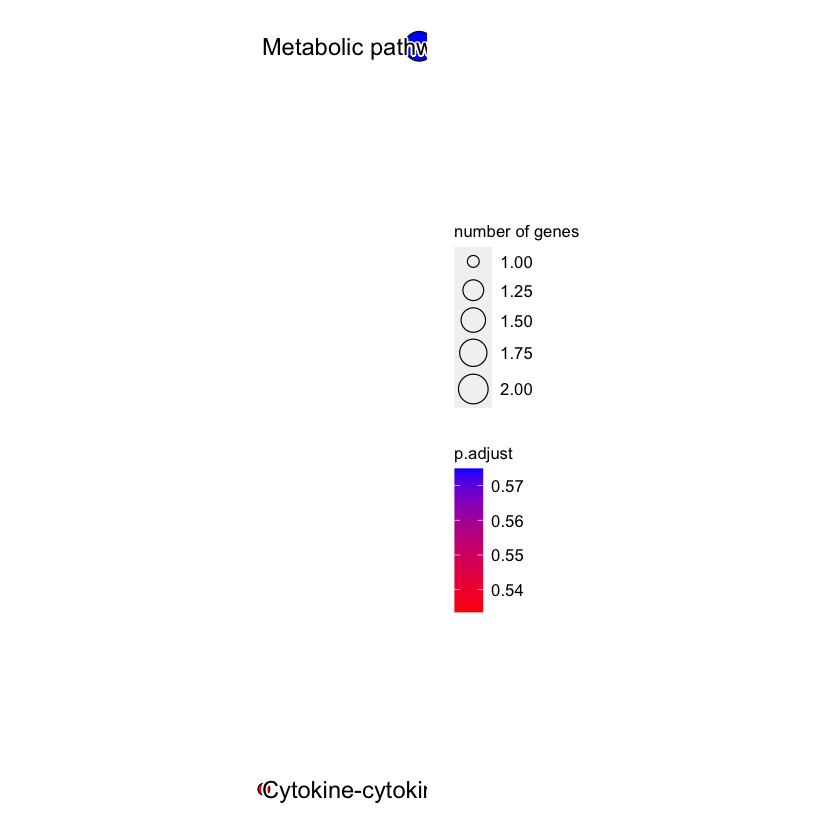

In [76]:
x3 <- pairwise_termsim(kk2)

emapplot(x3, showCategory=10)

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


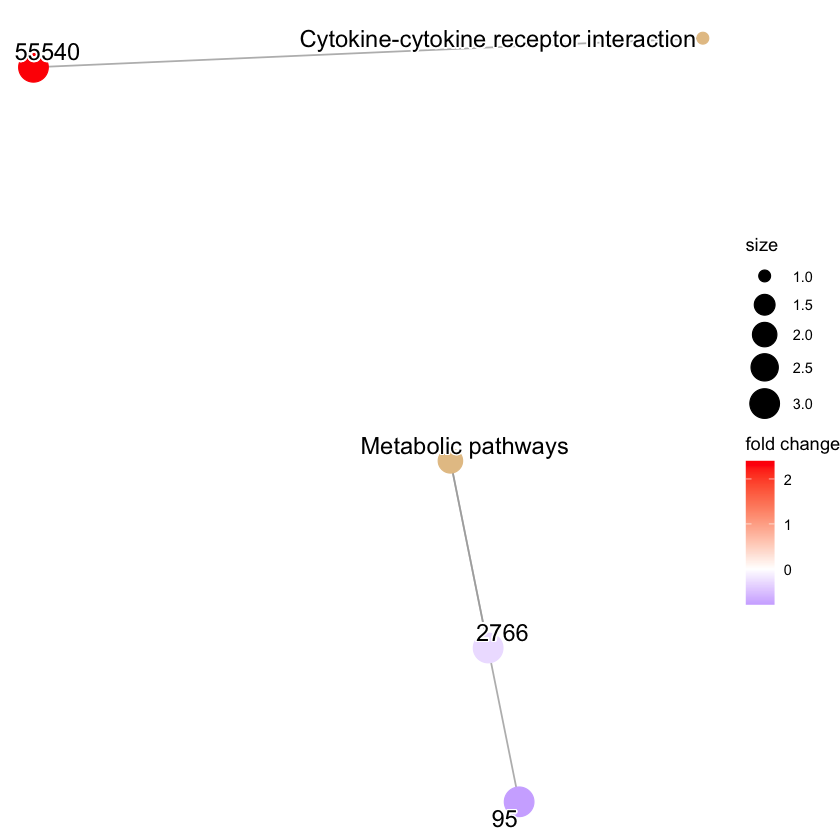

In [77]:
cnetplot(kk2, categorySize="pvalue", color.params = list(foldChange = kegg_gene_list))

Picking joint bandwidth of 0.145



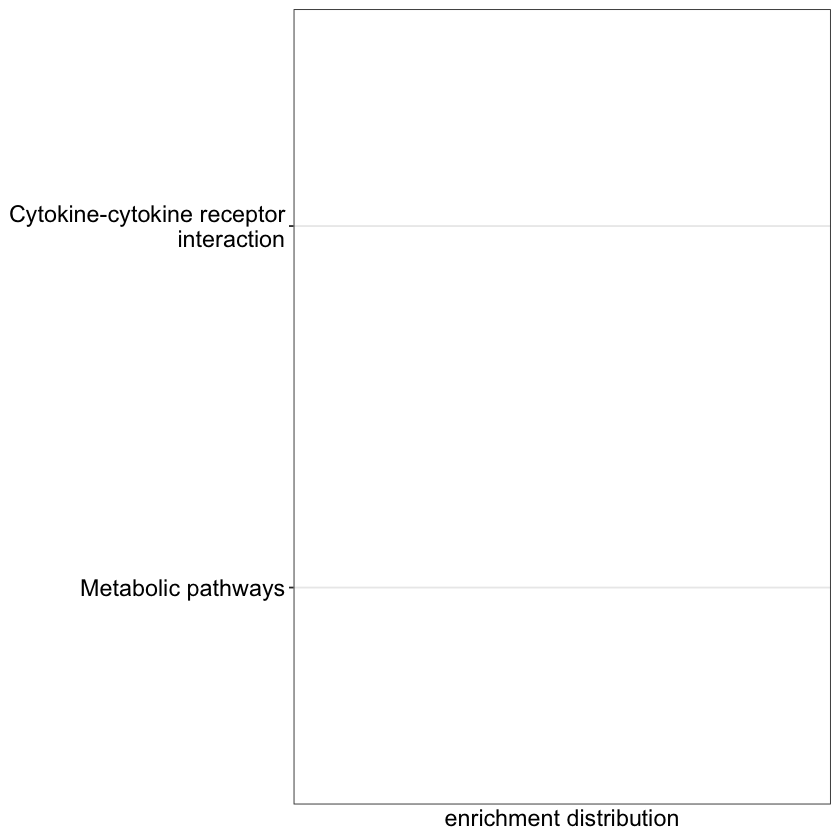

In [78]:
ridgeplot(kk2) + labs(x = "enrichment distribution")

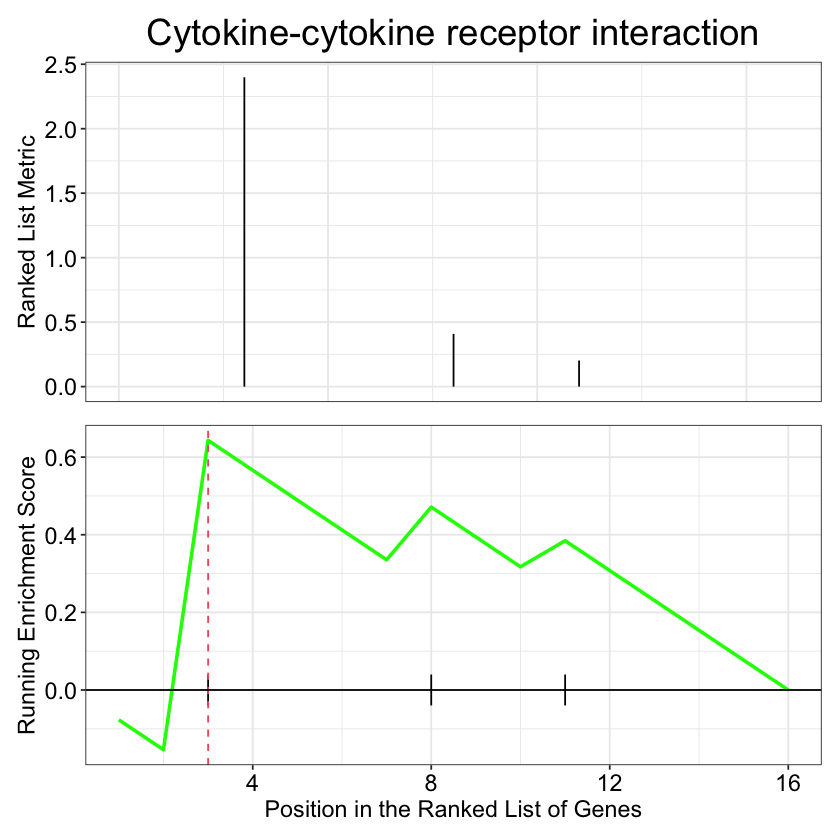

In [79]:
gseaplot(kk2, by = "all", title = kk2$Description[1], geneSetID = 1)

In [510]:
kk2$Description

[1] "Herpes simplex virus 1 infection"                             
 [2] "Transcriptional misregulation in cancer"                      
 [3] "Influenza A"                                                  
 [4] "Circadian rhythm"                                             
 [5] "Antigen processing and presentation"                          
 [6] "Cytokine-cytokine receptor interaction"                       
 [7] "MAPK signaling pathway"                                       
 [8] "Viral protein interaction with cytokine and cytokine receptor"
 [9] "Aldosterone synthesis and secretion"                          
[10] "Parathyroid hormone synthesis, secretion and action"          
[11] "Cytosolic DNA-sensing pathway"                                
[12] "cAMP signaling pathway"                                       
[13] "Measles"                                                      
[14] "MicroRNAs in cancer"                                          
[15] "TGF-beta signaling pathway"                                   
[16] "Toll-like receptor signaling pathway"                         
[17] "FoxO signaling pathway"                                       
[18] "AMPK signaling pathway"                                       
[19] "Cortisol synthesis and secretion"                             
[20] "Primary immunodeficiency"                                     
[21] "Spliceosome"                                                  
[22] "Ovarian steroidogenesis"                                      
[23] "Cocaine addiction"                                            
[24] "Aldosterone-regulated sodium reabsorption"                    
[25] "Maturity onset diabetes of the young"                         
[26] "cGMP-PKG signaling pathway"                                   
[27] "AGE-RAGE signaling pathway in diabetic complications"         
[28] "Glucagon signaling pathway"                                   
[29] "Serotonergic synapse"                                         
[30] "RIG-I-like receptor signaling pathway"                        
[31] "mRNA surveillance pathway"                                    
[32] "Ribosome"                                                     
[33] "Epstein-Barr virus infection"                                 
[34] "Glutathione metabolism"                                       
[35] "Retinol metabolism"                                           
[36] "Chemical carcinogenesis - DNA adducts"                        
[37] "Renin secretion"                                              
[38] "Regulation of lipolysis in adipocytes"                        
[39] "Fc epsilon RI signaling pathway"                              
[40] "Proteasome"                                                   
[41] "PI3K-Akt signaling pathway"                                   
[42] "Chemokine signaling pathway"                                  
[43] "Insulin resistance"                                           
[44] "Ras signaling pathway"                                        
[45] "Coronavirus disease - COVID-19"                               
[46] "Rap1 signaling pathway"                                       
[47] "Insulin secretion"                                            
[48] "Bile secretion"                                               
[49] "Calcium signaling pathway"                                    
[50] "Thyroid hormone synthesis"                                    
[51] "TNF signaling pathway"                                        
[52] "Butanoate metabolism"                                         
[53] "Hepatitis C"                                                  
[54] "Toxoplasmosis"                                                
[55] "Gastric acid secretion"                                       
[56] "Circadian entrainment"                                        
[57] "Longevity regulating pathway"                                 
[58] "Phagosome"                                                    

In [511]:
kk2

#
# Gene Set Enrichment Analysis
#
#...@organism 	 hsa 
#...@setType 	 KEGG 
#...@geneList 	 Named num [1:7620] 5.39 5.29 4.86 4.33 3.97 ...
 - attr(*, "names")= chr [1:7620] "5166" "6340" "2877" "1080" ...
#...nPerm 	 
#...pvalues adjusted by 'none' with cutoff <0.05 
#...63 enriched terms found
'data.frame':	63 obs. of  11 variables:
 $ ID             : chr  "hsa05168" "hsa05202" "hsa05164" "hsa04710" ...
 $ Description    : chr  "Herpes simplex virus 1 infection" "Transcriptional misregulation in cancer" "Influenza A" "Circadian rhythm" ...
 $ setSize        : int  273 104 92 20 35 98 170 32 41 62 ...
 $ enrichmentScore: num  -0.476 0.482 -0.438 0.723 -0.566 ...
 $ NES            : num  -2.52 2.06 -1.99 2.2 -2.07 ...
 $ pvalue         : num  1.00e-10 1.84e-06 3.06e-05 4.01e-05 7.68e-05 ...
 $ p.adjust       : num  1.00e-10 1.84e-06 3.06e-05 4.01e-05 7.68e-05 ...
 $ qvalue         : num  2.89e-08 2.66e-04 2.90e-03 2.90e-03 4.03e-03 ...
 $ rank           : num  2128 1029 1577 692 1271

In [512]:
library(pathview)

# Produce the native KEGG plot (PNG)
dme <- pathview(gene.data=kegg_gene_list, pathway.id= demo.paths$sel.paths[1], species = "hsa")

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /Users/rishabhgoel/Desktop

Info: Writing image file hsa04110.pathview.png



In [513]:
knitr::include_graphics("image file mentioned abov")

[1] "hsa04110.pathview.png"
attr(,"class")
[1] "knit_image_paths" "knit_asis"       

In [515]:
kk <- enrichKEGG(gene= expression_file$entrez,
                 organism="human", pvalueCutoff = 0.05, keyType = "ncbi-geneid")

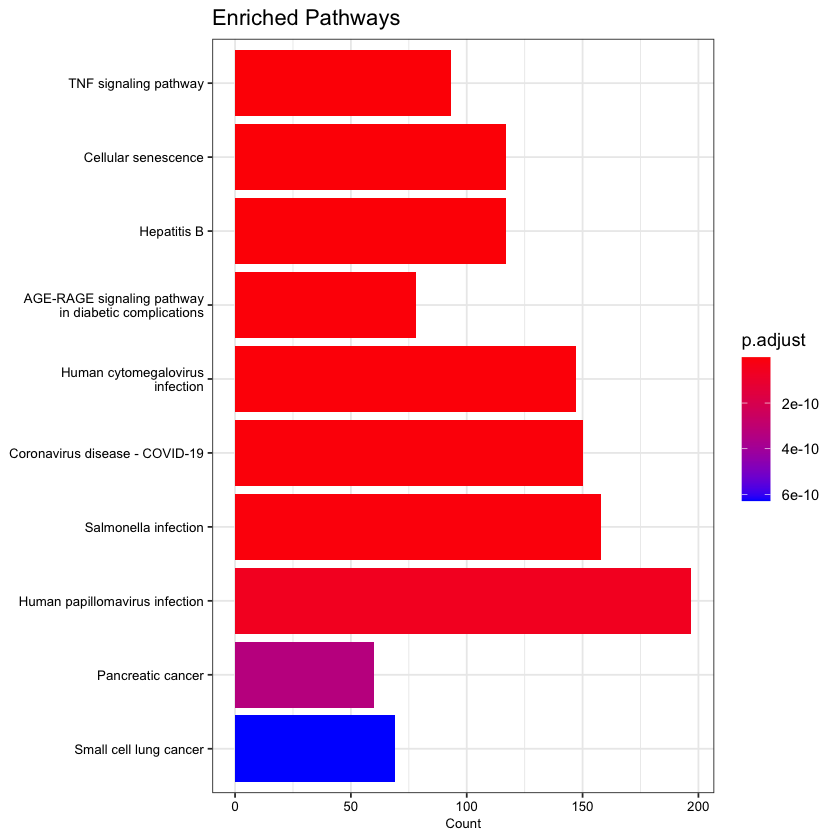

In [516]:
barplot(kk, 
        showCategory = 10, 
        title = "Enriched Pathways",
        font.size = 8)

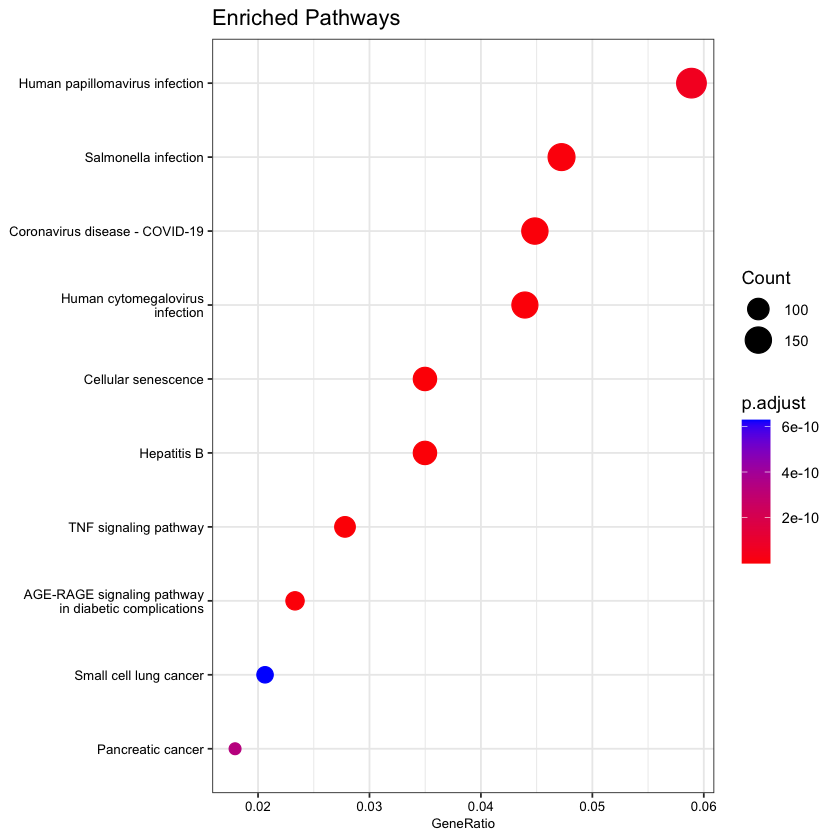

In [517]:
dotplot(kk, 
        showCategory = 10, 
        title = "Enriched Pathways",
        font.size = 8)